# Decision Trees in scikit-learn
Using the `DecisionTreeClassifier` in scikit-learn.  

In [1]:
import pandas as pd
import numpy as np
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
import matplotlib.pyplot as plt


In [2]:
apears = pd.read_csv('data/ApplesPears.csv')
apears.head()

,Greeness,Height,Width,Taste,Weight,H/W,Class
0,210,60,62,Sweet,186,0.97,Apple
1,220,70,53,Sweet,180,1.32,Pear
2,215,55,50,Tart,152,1.10,Apple
3,180,76,40,Sweet,152,1.90,Pear
4,220,68,45,Sweet,153,1.51,Pear


scikit-learn can deal with a category class label but it cannot deal with categorical features.  
So we drop the `Taste` feature. 

See later in the notebook for how to deal with categorical features

In [3]:
y = apears.pop('Class').values
apears.pop('Taste')    # Can't deal with category features
ap_features = apears.columns
X = apears.values
X[0]

array([210.  ,  60.  ,  62.  , 186.  ,   0.97])

In [4]:
ap_features

Index(['Greeness', 'Height', 'Width', 'Weight', 'H/W'], dtype='object')

In [5]:
y

array(['Apple', 'Pear', 'Apple', 'Pear', 'Pear', 'Apple', 'Pear', 'Apple',
       'Apple', 'Apple'], dtype=object)

In [6]:
apears

,Greeness,Height,Width,Weight,H/W
0,210,60,62,186,0.97
1,220,70,53,180,1.32
2,215,55,50,152,1.10
3,180,76,40,152,1.90
4,220,68,45,153,1.51
5,160,65,68,221,0.96
6,215,63,45,140,1.40
7,180,55,56,154,0.98
8,220,68,65,221,1.05
9,190,60,58,174,1.03


Two key methods:
1. `fit` method will train the tree from the data.
2. `predict` method will produce class predictions for an array of test data. 

In [8]:
dtree = DecisionTreeClassifier(criterion='entropy')
ap_tree = dtree.fit(apears, y)

In [11]:

ap_tree.predict([X[2]])

/Users/mauricio.reis/.pyenv/versions/3.9.9/lib/python3.9/site-packages/sklearn/base.py:420: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


array(['Apple'], dtype=object)

### Plot the tree

Note that the left hand branch is always "Y".  Pure leaf nodes have no decision in line 1.

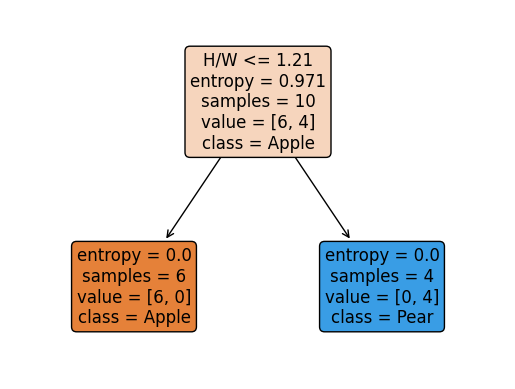

In [12]:
tree.plot_tree(ap_tree, feature_names=ap_features, fontsize = 12,
                      class_names=['Apple','Pear'],  
                      filled=True, rounded=True) 
None # supressing the verbose return from plot_tree

In [13]:
apears.pop('H/W')    # Delete this feature to make it harder
X = apears.values
ap_features = apears.columns

In [14]:
ap2_tree = dtree.fit(X, y)

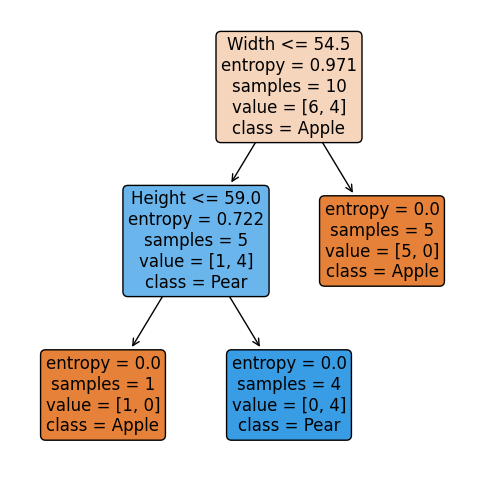

In [15]:
fig, ax = plt.subplots(figsize=(6,6))
tree.plot_tree(ap2_tree,feature_names=ap_features, fontsize = 12,
                      class_names=['Apple','Pear'],  
                      filled=True, rounded=True) 
None # supressing the verbose return from plot_tree

***
   ## Athlete Data

In [18]:
import pandas as pd
athlete = pd.read_csv('data/AthleteSelection.csv',index_col = 'Athlete')
athlete.head()

,Speed,Agility,Selected
Athlete,,,
x1,2.50,6.00,No
x2,3.75,8.00,No
x3,2.25,5.50,No
x4,3.25,8.25,No
x5,2.75,7.50,No


In [19]:
y = athlete.pop('Selected').values
X = athlete.values

In [20]:
atree = DecisionTreeClassifier(criterion='gini')
atree = atree.fit(X,y)

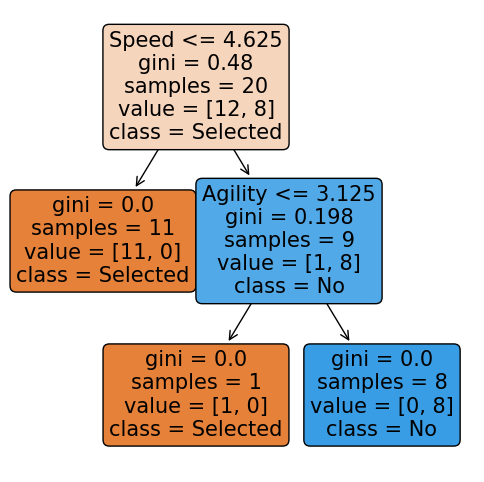

In [21]:
fig, ax = plt.subplots(figsize=(6, 6))
tree.plot_tree(atree, feature_names=['Speed','Agility'],  
                      class_names=['Selected','No'],  
                      filled=True, rounded=True,)
None # supressing the verbose return from plot_tree

Run a test example, select one of the training examples

In [22]:
y_pred = atree.predict([X[5]])
print('Prediced class label:',y_pred[0])

Prediced class label: No


## Restaurant Data
Predictive features are categories (rather than numeric).

In [23]:
import pandas as pd
restaurant = pd.read_csv('data/restaurant.csv',index_col = 'No')
restaurant.head()

,Alternate,Bar,Fri/Sat,Hungry,Patrons,Price,Raining,Reservation,Type,WaitEst,WillWait?
No,,,,,,,,,,,
1,Yes,No,No,Yes,Some,$$$,No,Yes,French,0-10,Yes
2,Yes,No,No,Yes,Full,$,No,No,Thai,30-60,No
3,No,Yes,No,No,Some,$,No,No,Burger,0-10,Yes
4,Yes,No,Yes,Yes,Full,$,No,No,Thai,10-30,Yes
5,Yes,No,Yes,No,Full,$$$,No,Yes,French,>60,No


## Dealing with category data
Convert to numeric - two options:  
1. `get_dummies` method for pandas.
2. `OneHotEncoding` for sklearn. 

In [24]:
df = pd.DataFrame({'Pet': ['cat', 'dog', 'cat','ferret'], 
                   'Transport': ['bike', 'car', 'car','bike'],
                   'Area': ['urban','urban','rural','urban']})
df

,Pet,Transport,Area
0,cat,bike,urban
1,dog,car,urban
2,cat,car,rural
3,ferret,bike,urban


### Pandas `get_dummies`
The Pandas `get_dummies` method is the easiest way to do One-Hot encoding.  
But if you want to apply the encoding to a test file later, this gets awkward

In [25]:
pd.get_dummies(df)

,Pet_cat,Pet_dog,Pet_ferret,Transport_bike,Transport_car,Area_rural,Area_urban
0,1,0,0,1,0,0,1
1,0,1,0,0,1,0,1
2,1,0,0,0,1,1,0
3,0,0,1,1,0,0,1


In [26]:
pd.get_dummies(df,drop_first=True)

,Pet_dog,Pet_ferret,Transport_car,Area_urban
0,0,0,0,1
1,1,0,1,1
2,0,0,1,0
3,0,1,0,1


### Using `OneHotEncoder` to convert category features to numbers

In [27]:
from sklearn.preprocessing import OneHotEncoder, LabelEncoder
onehot_encoder = OneHotEncoder(sparse=False)
dfOH = onehot_encoder.fit_transform(df)
dfOH

/Users/mauricio.reis/.pyenv/versions/3.9.9/lib/python3.9/site-packages/sklearn/preprocessing/_encoders.py:828: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


array([[1., 0., 0., 1., 0., 0., 1.],
       [0., 1., 0., 0., 1., 0., 1.],
       [1., 0., 0., 0., 1., 1., 0.],
       [0., 0., 1., 1., 0., 0., 1.]])

In [28]:
type(dfOH)

numpy.ndarray

In [29]:
onehot_encoder.get_feature_names_out()

array(['Pet_cat', 'Pet_dog', 'Pet_ferret', 'Transport_bike',
       'Transport_car', 'Area_rural', 'Area_urban'], dtype=object)

In [30]:
onehot_encoder.categories_

[array(['cat', 'dog', 'ferret'], dtype=object),
 array(['bike', 'car'], dtype=object),
 array(['rural', 'urban'], dtype=object)]

### `LabelEncoder` also converts category features to numbers
This is more compact.  
But it is not exactly what we want as the numbers are misleading.  
Ferrets are not more like dogs than cats. (Well maybe they are!)

In [31]:
# LabelEncoder only works on single columns so we must 'apply' it to the dataframe. 
label_encoder = LabelEncoder()
labelE = df.apply(label_encoder.fit_transform)
labelE

,Pet,Transport,Area
0,0,0,1
1,1,1,1
2,0,1,0
3,2,0,1


---
# Restaurant Data 
## Using OneHotEncoding
`OneHotEncoder` class has two key methods:   
1. `fit` to 'learn' the transform from the data,
2. `transform` to apply the OneHot transform to the data, the transform can be applied to other (e.g. test) datasets.


In [32]:
restaurant = pd.read_csv('data/restaurant.csv', index_col = 'No')
restaurant.head()

,Alternate,Bar,Fri/Sat,Hungry,Patrons,Price,Raining,Reservation,Type,WaitEst,WillWait?
No,,,,,,,,,,,
1,Yes,No,No,Yes,Some,$$$,No,Yes,French,0-10,Yes
2,Yes,No,No,Yes,Full,$,No,No,Thai,30-60,No
3,No,Yes,No,No,Some,$,No,No,Burger,0-10,Yes
4,Yes,No,Yes,Yes,Full,$,No,No,Thai,10-30,Yes
5,Yes,No,Yes,No,Full,$$$,No,Yes,French,>60,No


In [33]:
y = restaurant.pop('WillWait?').values
X = restaurant.values
X[:3,]

array([['Yes', 'No', 'No', 'Yes', 'Some', '$$$', 'No', 'Yes', 'French',
        '0-10'],
       ['Yes', 'No', 'No', 'Yes', 'Full', '$', 'No', 'No', 'Thai',
        '30-60'],
       ['No', 'Yes', 'No', 'No', 'Some', '$', 'No', 'No', 'Burger',
        '0-10']], dtype=object)

In [34]:
onehot_encoder = OneHotEncoder(sparse=False)  # We can add drop='first' 
restOH = onehot_encoder.fit(restaurant)
restOH_data = restOH.transform(restaurant)

/Users/mauricio.reis/.pyenv/versions/3.9.9/lib/python3.9/site-packages/sklearn/preprocessing/_encoders.py:828: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


In [35]:
restaurant.columns

Index(['Alternate', 'Bar', 'Fri/Sat', 'Hungry', 'Patrons', 'Price', 'Raining',
       'Reservation', 'Type', 'WaitEst'],
      dtype='object')

In [36]:
restOH.get_feature_names_out(restaurant.columns)

array(['Alternate_No', 'Alternate_Yes', 'Bar_No', 'Bar_Yes', 'Fri/Sat_No',
       'Fri/Sat_Yes', 'Hungry_No', 'Hungry_Yes', 'Patrons_Full',
       'Patrons_None', 'Patrons_Some', 'Price_$', 'Price_$$', 'Price_$$$',
       'Raining_No', 'Raining_Yes', 'Reservation_No', 'Reservation_Yes',
       'Type_Burger', 'Type_French', 'Type_Italian', 'Type_Thai',
       'WaitEst_0-10', 'WaitEst_10-30', 'WaitEst_30-60', 'WaitEst_>60'],
      dtype=object)

In [37]:
# this is the number of features now in the dataset

restOH.get_feature_names_out(restaurant.columns).size

# Add the drop='first' parameter to the encoding and see how many features you end up with 

26

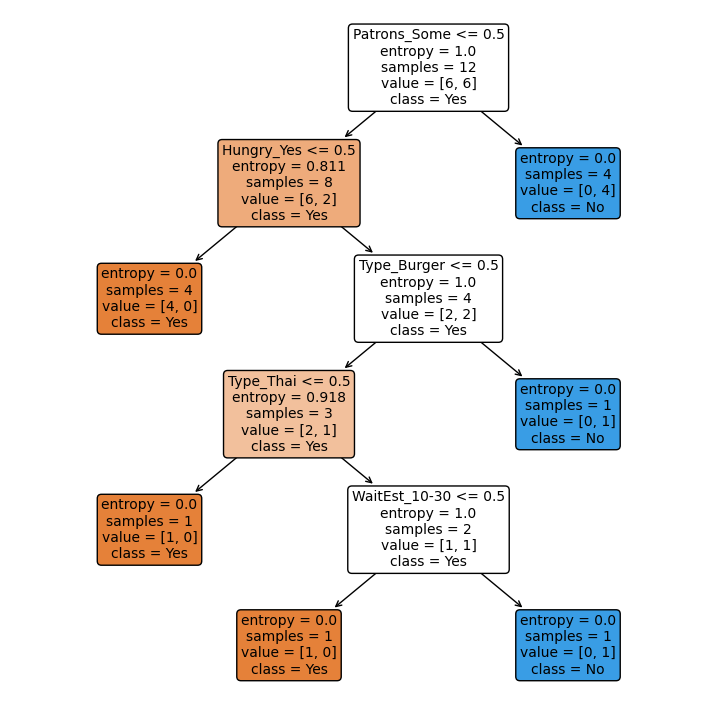

In [38]:
rtree = DecisionTreeClassifier(criterion='entropy')
rtreeOH = rtree.fit(restOH_data,y)
fig, ax = plt.subplots(figsize=(9, 9))
tree.plot_tree(rtreeOH, feature_names=restOH.get_feature_names_out(restaurant.columns),
                      class_names=['Yes','No'], fontsize = 10, 
                      filled=True, rounded=True)
None # supressing the verbose return from plot_tree

---
## Penguins Data
For more information on the Penguins dataset see:
https://allisonhorst.github.io/palmerpenguins/ 


In [40]:
penguins = pd.read_csv('data/penguins_train.csv')
penguins.head()

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181,3750,male
1,Adelie,Torgersen,39.5,17.4,186,3800,female
2,Adelie,Torgersen,40.3,18.0,195,3250,female
3,Adelie,Torgersen,36.7,19.3,193,3450,female
4,Adelie,Torgersen,39.3,20.6,190,3650,male


In [41]:
# keep only the numeric features
f_names = ['bill_length_mm', 'bill_depth_mm','flipper_length_mm', 'body_mass_g']
X = penguins[f_names].values
y = penguins['species']
species_names = np.unique(y)
species_names

array(['Adelie', 'Chinstrap', 'Gentoo'], dtype=object)

In [42]:
X.shape

(333, 4)

### Build the tree and visualise

Changing the `min_samples_leaf` attributes will change the *bushiness* of the tree.     


In [43]:
ptree = DecisionTreeClassifier(criterion='entropy', min_samples_leaf=20)
ptree.fit(X,y)

DecisionTreeClassifier(criterion='entropy', min_samples_leaf=20)

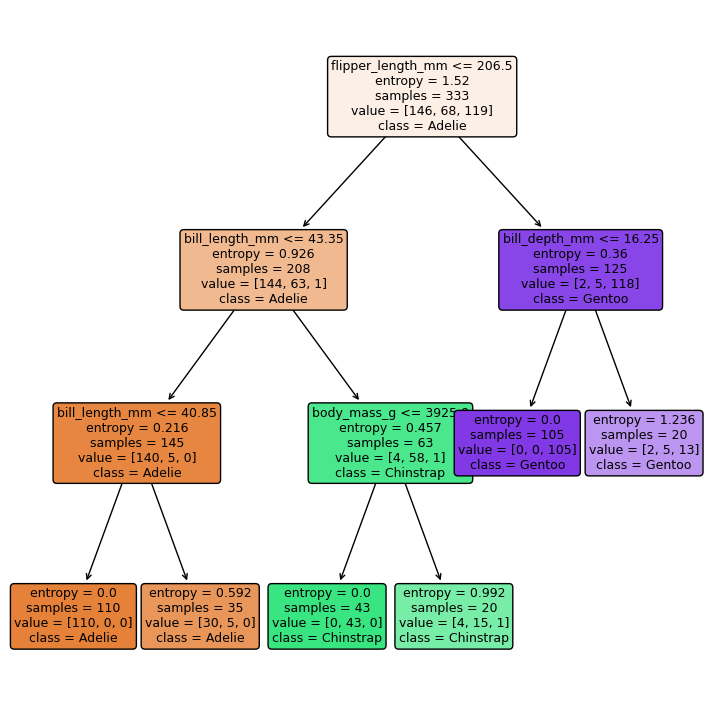

In [44]:
fig, ax = plt.subplots(figsize=(9, 9))
tree.plot_tree(ptree, feature_names=f_names,  
                      class_names=species_names, fontsize = 9,
                      filled=True, rounded=True) 
None # supressing the verbose return from plot_tree

In [45]:
ptree.get_n_leaves()   # number of leaves

6